In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

df2016 = pd.read_csv('hockey_team_2016.csv')
df2017 = pd.read_csv('hockey_team_2017.csv')
df2018 = pd.read_csv('hockey_team_2018.csv')
df2019 = pd.read_csv('hockey_team_2019.csv')

In [2]:
df2016['Year'] = 2016
df2017['Year'] = 2017
df2018['Year'] = 2018
df2019['Year'] = 2019

# Questions to answer
## 1. Can we predict who makes it to the playoffs?
## 2. What stat (outside of W/L) is the best indicator of playoff qualification?

In [3]:
df = pd.concat([df2016,df2017,df2018,df2019], ignore_index=True)


def _playoff_return(data):
    if('*' in data):
        return 1
    else:
        return 0

df["Playoff"] = df["Name"].apply(_playoff_return)

df.head(10)

,Rk,Name,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Year,Playoff
0,1,Washington Capitals*,27.9,82,56,18,8,120,0.732,248,...,5,9.2,8.9,2510,9.9,2332,0.918,3,2016,1
1,2,Dallas Stars*,28.9,82,50,23,9,109,0.665,265,...,15,8.8,9.0,2624,10.1,2371,0.904,5,2016,1
2,3,St. Louis Blues*,28.0,82,49,24,9,107,0.652,219,...,5,10.5,9.2,2474,8.9,2439,0.919,10,2016,1
3,4,Pittsburgh Penguins*,29.0,82,48,26,8,104,0.634,241,...,5,8.5,8.9,2722,8.9,2436,0.918,6,2016,1
4,5,Anaheim Ducks*,27.4,82,46,25,11,103,0.628,215,...,3,12.5,11.1,2483,8.7,2258,0.917,8,2016,1
5,6,Chicago Blackhawks*,28.6,82,47,26,9,103,0.628,234,...,3,7.5,8.6,2498,9.4,2526,0.918,8,2016,1
6,7,Florida Panthers*,29.2,82,47,26,9,103,0.628,232,...,5,10.4,10.4,2358,9.8,2419,0.917,4,2016,1
7,8,Los Angeles Kings*,28.3,82,48,28,6,102,0.622,223,...,3,10.6,9.1,2625,8.5,2254,0.915,7,2016,1
8,9,New York Rangers*,29.6,82,46,27,9,101,0.616,233,...,5,8.6,8.3,2336,10.0,2494,0.914,5,2016,1
9,10,New York Islanders*,27.9,82,45,27,10,100,0.610,227,...,6,8.8,9.2,2412,9.4,2495,0.915,4,2016,1


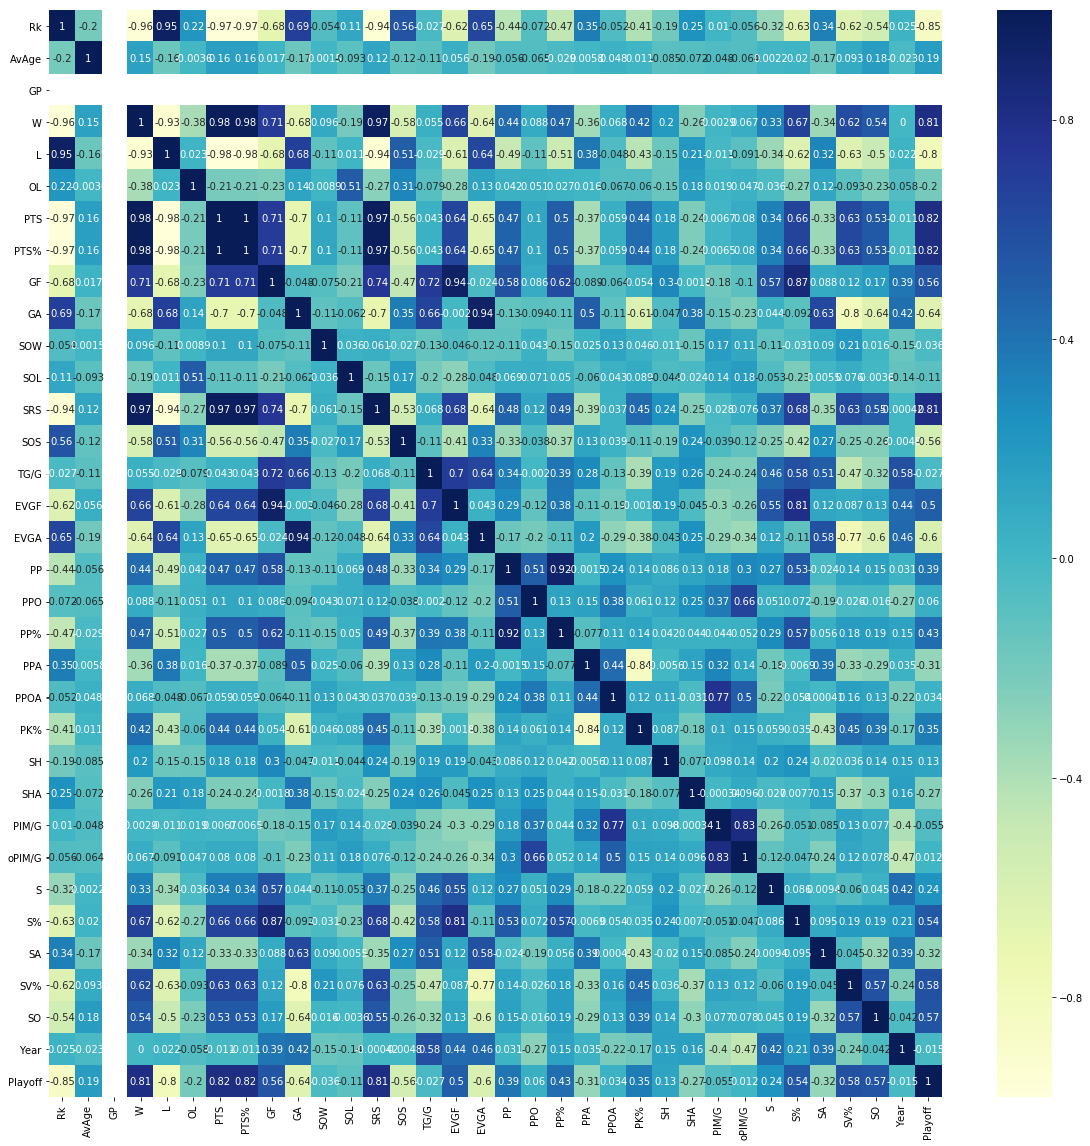

In [34]:
# Correalation Heatmap of all features

import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True,
        cmap="YlGnBu")

In [5]:
X = df.drop(columns = ['Rk', 'Name', 'Playoff', 'Year'])
y = df.Playoff

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
svm_classifier = svm.SVC(kernel = 'rbf', gamma = 1, C = 10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
svm_classifier.score(X, y)

0.8934426229508197

In [8]:
x1 = df.W
x2 = df.L
X_train = np.array(list(zip(x1,x2)))
y_train = df.Playoff.values

In [9]:
# Create labels and colors for graphs

color_ls = []
label = []

for k in y_train:
    if k == 1:
        color_ls.append('b')
        label.append('Post')
    else:
        color_ls.append('r')
        label.append('NotP')
        
print(color_ls)
print(label)

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
['Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'NotP', 'Post', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'NotP', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'Post', 'NotP', 'Post', 'Post', 'NotP', 'Not

In [10]:
svm_classifier = svm.SVC(kernel = 'linear', gamma = 1, C = 0.1)
svm_classifier.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Wins / Losses (X/Y)

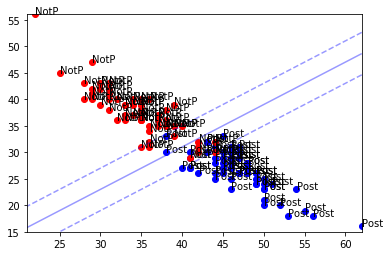

In [11]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [12]:
svm_classifier.score(X_train, y_train)

0.9262295081967213

In [13]:
x1 = df.GF
x2 = df.GA
X_train = np.array(list(zip(x1,x2)))

In [14]:
svm_classifier = svm.SVC(kernel = 'linear', gamma = 1, C = 1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Goals For / Goals Against

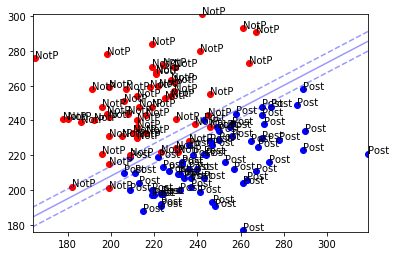

In [15]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [16]:
svm_classifier.score(X_train, y_train)

0.9344262295081968

In [17]:
x1 = df['PP%']
x2 = df['PK%']
X_train = np.array(list(zip(x1,x2)))

In [18]:
svm_classifier = svm.SVC(kernel = 'linear', gamma = 1, C = 1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Power Play % / Penalty Kill %

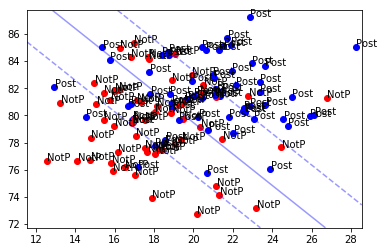

In [19]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [20]:
svm_classifier.score(X_train, y_train)

0.7295081967213115

In [21]:
svm_classifier = svm.SVC(kernel = 'poly', gamma = 1, C = 1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

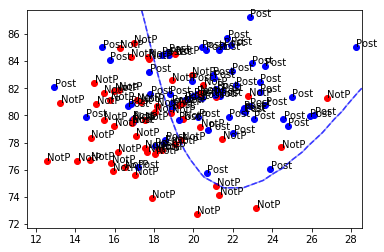

In [22]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [23]:
svm_classifier.score(X_train, y_train)

0.7540983606557377

In [24]:
x1 = df['S']
x2 = df['SA']
X_train = np.array(list(zip(x1,x2)))

svm_classifier = svm.SVC(kernel = 'linear', gamma = 1, C = 10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Shots / Shots Against

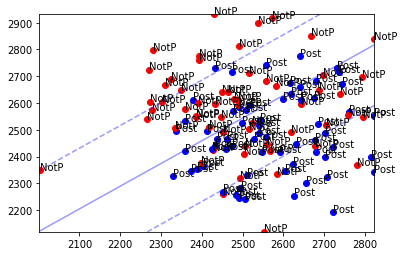

In [25]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [26]:
svm_classifier.score(X_train, y_train)

0.6967213114754098

In [35]:
x1 = df['S%']
x2 = df['SV%']
X_train = np.array(list(zip(x1,x2)))

svm_classifier = svm.SVC(kernel = 'linear', gamma = 100, C = 10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Shot % / Save %

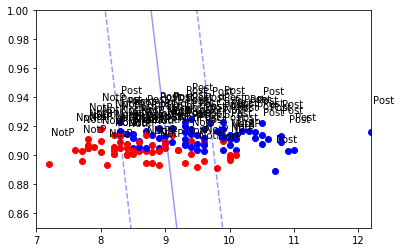

In [36]:
def plot_decision_boundary_small_nums(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(7, xx1.max())
    plt.ylim(0.85, 1)

plot_decision_boundary_small_nums(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [29]:
svm_classifier.score(X_train, y_train)

0.860655737704918

# Powerplay Goals / Shutouts

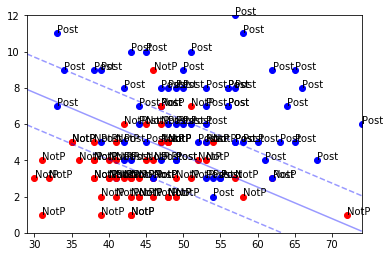

In [30]:
x1 = df['PP']
x2 = df['SO']
X_train = np.array(list(zip(x1,x2)))

svm_classifier = svm.SVC(kernel = 'linear', gamma = 1, C = 100)
svm_classifier.fit(X_train, y_train)
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [31]:
svm_classifier.score(X_train, y_train)

0.7377049180327869

# What we learned

## 1. W/L is a great indicator of playoff qualifications (which it should be)
## 2. Goals for / Goals Against is slightly better predictor than W/L
## 3. Other stats that correlate to wins and goals are still good indicators of playoff qualification

# Next Steps

## 1. Look for other indicators of team performance and create models (fights, passing)
## 2. See if stats unrelated to game affect performance (costs of team/players)
## 3. See how teams perform during 2019-2020 season and predict based on their data